# Thermo-optic Phase Modulator Theory

In [1]:
import sympy as sy

Physics theory behind a thermo-optic phase shifter

\begin{equation}
\frac{d\phi}{dT} = \frac{2 \pi L (\frac{dn}{dT} + n(T)\alpha(T))}{\lambda}
\end{equation}

We know that the thermo-optic coefficient of the material $\beta(T) = \frac{dn}{dT}$ is dependent of the temperature.

Note that if we wanted to understand the dynamic behaviour of the device, we'd need to understand the time differential on the dimensionally proper values that change over time. For this we use SymPy to differentiate.

We must take into account that there are only two variables that really change over time when a heater is turned on and off. The temperature changes over time so all temperature dependent variables are also time dependent in this case: $n$, $\alpha$ and accordingly $\phi$.

In [8]:
lambda_0, L, rho, t, T, w= sy.symbols("lambda_0 L \\rho t T w")
alpha = sy.Function("\\alpha ")(t, T)
phi = sy.Function("\\phi")(t, T)
n = sy.Function("n")(t, T)

In [9]:
phi

\phi(t, T)

In [10]:
dphi_dT = 2 * sy.pi * L * ( n.diff(T) + n * alpha) / lambda_0
dphi_dT

2*pi*L*(\alpha (t, T)*n(t, T) + Derivative(n(t, T), T))/lambda_0

So we can integrate this to get the absolute phase $\phi$ for a given temperature.

In [11]:
phi_expression = sy.integrate(dphi_dT, T)
phi_expression

2*pi*L*(Integral(\alpha (t, T)*n(t, T), T) + Integral(Derivative(n(t, T), T), T))/lambda_0

However, in reality what we care about is the phase change, so if we assume that we have discrete changes, we can then write something of the order:

\begin{equation}
\Delta \phi = \frac{2 \pi L\frac{dn}{dT}  \Delta T }{\lambda}
\end{equation}

If we were to consider the inputs and outputs of the system, let's consider the electro-magnetic wave that enters the heated waveguide path. Accroding to the length of the computation, the phase will be different and calculated at each step of the way if desired. The other interesting aspect would be how the temperature changes the properties of the other part of the optical signal. The interesting thing to compute as well would be what if the signal changes midway throughout the waveguide, or if you have an electronic signal changing at similar time-stamps as the optical waveguide - particularly relevant for an RF-modelled design. 

So our electronic signal would be somthing of the sort: $v(t)$ and $i(t)$ that is digitally or mixed-signal RF emmitted.

You can in theory perform frequency analysis over these type of electronic signals, but the issue there is that you then need to perform freqeuncy analysis over the electro-optic response. But at least in the case of electro-optic modulators, it is a viable assumption that electronic signal will modulate the optical frequency at given operation frequencies - would you perform frequency analysis on the optical signal too in this case?

We know each thermo-optic heater will have a given resistance of the form, for a given sheet resistance $\rho$.

In [12]:
def resistance_calculator(heater_length=L,
                          heater_width=w,
                          heater_square_resistance = rho):
    return heater_square_resistance * heater_length / heater_width

In [13]:
resistance_calculator()

L*\rho/w

Note that this resistance is in the form $\Omega$ and only considers the real electrical resistance assuming DC operation of $V(t) = i(t)R$ Ohm's law, and does not consider parasitic capacitances and impedances. So part of the issue as well is that we're not considering the frequency response of the impedance of the heaters in relation to the input response. We can assume there's an electrically-inputted total power of $P(t) = V(t)i(t)$, and there will be an efficiency fraction $\eta$ that becomes thermal power. Hence, thermal power $P_T(t) = \eta V(t)i(t)$

Let's assume DC impedance is applicable at low frequencies. We then need to understand the electro-thermal dynamic response to the input signal. Assuming the temporal response from:

* https://doi.org/10.1116/1.1914815
* https://www.osapublishing.org/oe/fulltext.cfm?uri=oe-27-8-10456&id=408126
* https://ieeexplore.ieee.org/document/9184872

We could argue there is an electro-thermal time constant of a first order control system of the form:

<img src="img/first_second_order_system_step_response.jpg" width=75% />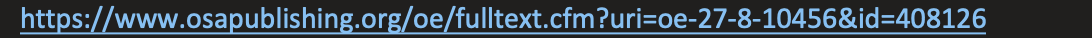

Note that the first order system model response to a step input is in the form:

\begin{equation}
r(t) = 1 - e^{-t/\tau}
\end{equation}

where $\tau$ is the time constant that determines the speed of the response. A second order system can be equally used to model it in case of oscillations, or in an overdamped case, to understand whatever real effect of damping exists.


With regards to the dynamic characterization, it is known that:

>Figures 10(a) and 10(b) show the measured bandwidth and time-domain switching of the TiN
and N++ Si TOPS. In Fig. 10(a), the pattern generator produces a variable frequency sine wave
with
$V_{\pi}$ /2 
amplitude, and the amplitude response is read on the oscilloscope. The 3dB
bandwidth is 33 kHz for the TiN TOPS and 85 kHz for the N++ Si TOPS. In Fig. 10(b), a 5 kHz
square wave with
$V_{\pi}$ / 2
amplitude and the required offset to switch between the two first
extrema of optical transmission is applied to both heaters. The 1/e rise and fall time constants
are measured directly with the oscilloscope, and are
rise
3.7 μs,
fall =
7.2 μs for the TiN
TOPS, and
rise=
2.2 μs,
fall =
2.0 μs for the N++ Si TOPS. For the TiN TOPS, the asymmetric
time constants, i.e., significantly slower fall time, can be explained by the bad thermal
TiN TOPS
Gap: oxide cladding
N++ Si TOPS
Gap: oxide cladding
N++ Si TOPS
Gap: etched oxide
N++ Si TOPS
Gap: deep trench
conductance between the heater and the heat drain [21], itself arising from the relatively thick
oxide layer and air surrounding the metal.

<img src="img/experimental_thermo_optic_heater_time_response.png" />

Hence, it is known that the effective electro-thermaml response model depends on the insulation length, insulation distance, and would require two time constants that would need to be embedded into the dynamic effective real response to a certain level of configuration. This can be mathematically done in the form in the response $r(P_T)$ for a given power $P_T$ change:

\begin{equation}
r(P, t) = \left\{
        \begin{array}{ll}
            1 - e^{-t/\tau_1} & \quad \frac{dP_T}{dt} \leq 0 \\
            1 - e^{-t/\tau_2} & \quad \frac{dP_T}{dt} \geq 0
        \end{array}
    \right.
\end{equation}

And this would apply for several asymetric electro-thermal response cases, also in case a second order model is desired, this would be replaced either in the rise or fall edge.

Another factor to consider is the position of the heater respect to the waveguide, and how this power transfers into a temperature position change, and this is very dependent on materials and configuration. This, in particular, may be further explored in Lumerical modelling, but analytically would require some clasical heat transfer 2D modelling that might be better using FEA, although analytical models exist.

So there's a couple of things that can already be observed from this model:

### Inputs:
* Optical signal with a given initial phase.
* Thermo-optic heater configuration including: materials, geometry, positions, phase change signal, electro-thermal efficiency, thermal parameters change during modulation?
* Electrical, time dependent signals that give total input electrical power. 

### Assumptions valid for a thermo-optic modulation:
* Electronic modulation frequency << optical modulation frequency, so can be treated as DC. Not valid for RF electro-optic modulation.

### Outputs
* Expected temperature reponse at the waveguide?
* Optical phase change at each point of the waveguide transmission dependent how the heater is time and space calculation stepped. 
* Time delay related to thermal effectse even if minimal?

Note that this thermo-optic may be modelled within a single calculation step. 
If electrical and optical signals are within the same frequency range as in an electro-optic modulator then this approach does not work as the dynamic changes can occur within the modulator path itself. This also depends on the length of the effect in relation to the modulation wavelength, that is nontrivial in RF. Note you then need to account for group-index and similar compatibility model parameters. The dynamic response will then be determined by further electro-thermal model parameters dependent on the papers. You then need to time and space chop the calculation of the signal as it propagates through the waveguide if you wish to get dynamic responses, and you need to take into account delays and inter-interference effects from dynamics delays when not a pure first order reponse occurs. The simulation method becomes time-stepped within space inside models, rather than time-stepped within models assuming some discrete absolute delay in that path - so may require different simulation methods - ie incompatible.